In [13]:
from ultralytics import YOLO
import cv2
from PIL import Image
from IPython.display import display
import numpy as np
from src import config, image_utils

In [14]:
# Chose Apple Metal Performance Shaders (MPS) if available, otherwise use CPU
# device = 'mps' if torch.backends.mps.is_available() else 'cpu'

# Use temporary CPU for now. There is some issue with MPS
device = 'cpu'

## Load pretrained YOLOv9 model

In [15]:
model = YOLO(config.YOLO_MODEL_PATH)

In [16]:
img = cv2.imread('./../datasets/images/test/23.jpeg')

In [17]:
results = model(
    img, 
    device=device, 
    conf=0.9,
    imgsz=800
)

0: 800x608 91 holds, 1 volume, 2047.8ms
Speed: 4.4ms preprocess, 2047.8ms inference, 1.0ms postprocess per image at shape (1, 3, 800, 608)


## Get first result

In [18]:
result = results[0]

In [19]:
print(result.names)

{0: 'hold', 1: 'volume'}


In [20]:
bboxes = np.array(result.boxes.xyxy.cpu(), dtype=int)
classes = np.array(result.boxes.cls.cpu(), dtype=int)
centers = (bboxes[:, :2] + bboxes[:, 2:]) / 2

# Draw bounding boxes

In [21]:
image_utils.draw_bboxes(
    img, 
    bboxes, 
    classes, 
    result.names,
    centers, 
    config.BBOX_COLOR, 
    config.BBOX_CENTER_COLOR, 
    config.LINE_WIDTH
)

## Draw the preview

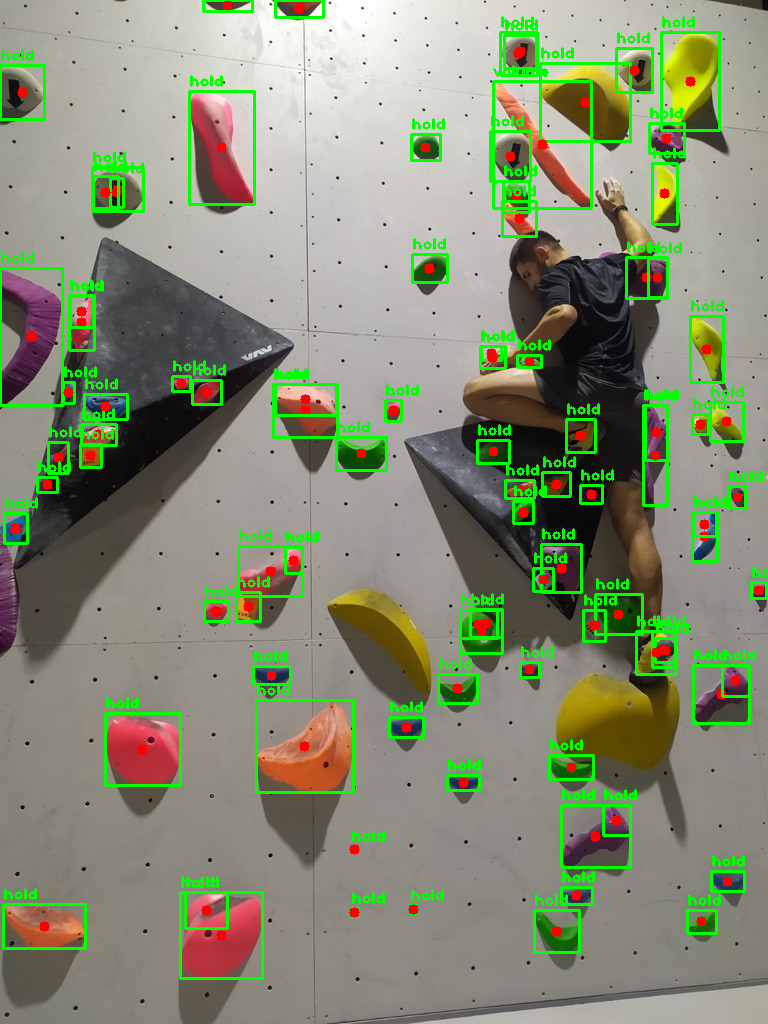

In [22]:
preview = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
display(Image.fromarray(preview))